# 1. xor1

In [ ]:
import numpy as np
np.random.rand(2,3) # U(0,1): uniform 0 to 1

array([[0.07582636, 0.03106314, 0.80291538],
       [0.01086901, 0.20261963, 0.10278597]])

In [ ]:
# xor1.ipynb
import numpy as np
def Sigmoid(x):
    return 1./(1.+np.exp(-x))

lamda = 1
x=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
t=np.array([[0],[1],[1],[0]])

w1=2*np.random.rand(3,3)-1 # np.random.rand : 2*(0~1) 난수 -1 : -1 ~ 1
w2=2*np.random.rand(3,1)-1

print(w1, '/', w2)

[[-0.37180927 -0.74655267 -0.38963072]
 [-0.17047736 -0.98237315  0.81893759]
 [ 0.82591866  0.70120659 -0.37411012]] / [[-0.90712285]
 [ 0.73143499]
 [-0.40465436]]


In [ ]:
h=Sigmoid(np.dot(x,w1))
y=Sigmoid(np.dot(h,w2))
print(y, h.shape)

[[0.54086895]
 [0.51459501]
 [0.60354234]
 [0.57764589]] (4, 3)


In [ ]:
for i in range(2000):
    h=Sigmoid(np.dot(x,w1))
    y=Sigmoid(np.dot(h,w2)) # dot(): matrix multiplication.

    deltaY= np.multiply(y-t,np.multiply(y,(1-y))) # multiply(): Multiply arguments element-wise.
    temp = np.multiply(w2.transpose(),np.multiply(h,(1-h)))
    deltaH = deltaY * temp

    w2 = w2 - np.dot(h.transpose(),lamda*deltaY) # back propagation
    w1 = w1 - np.dot(x.transpose(),lamda*deltaH)

print(y)
print(w1)
print(w2)

[[0.02513882]
 [0.9743143 ]
 [0.97584168]
 [0.02119499]]
[[ 2.2521138  -3.05506899 -1.95837437]
 [-4.23461574 -5.84557321  3.45660794]
 [ 4.53679259  5.80236824 -3.5226522 ]]
[[-5.23512994]
 [ 9.41023747]
 [ 5.29964178]]


In [ ]:
deltaH.shape

(4, 3)

# 2. XOR_NN_TF2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')
x, y

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(3, activation='sigmoid', input_dim=2))
#model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x, y, epochs=10000, verbose=0)
model.evaluate(x, y)

1/1 [==============================] - 0s 195ms/step - loss: 0.0155 - accuracy: 1.0000


[0.015527622774243355, 1.0]

In [ ]:
predicted = model.predict(x)
predicted

1/1 [==============================] - 0s 98ms/step


array([[0.01319701],
       [0.9767592 ],
       [0.99301034],
       [0.01812988]], dtype=float32)

In [ ]:
import tensorflow  as tf
import numpy as np

x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(3, activation='sigmoid', input_dim=2))
model.add(layers.Dense(1, activation='sigmoid'))
sgd= tf.keras.optimizers.SGD(learning_rate=0.1)
#model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x, y, epochs=10000, batch_size=4, verbose=0)
model.evaluate(x, y)
predicted = model.predict(x)
print(predicted)

1/1 [==============================] - 0s 43ms/step
[[0.01343732]
 [0.986445  ]
 [0.9828995 ]
 [0.01090094]]


# 3. XOR_DNN_TF2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')
x, y

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

In [ ]:
from tensorflow.keras import layers

#actFunc = 'sigmoid' # 학습이 안된다.
actFunc = 'relu' # 된다.
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation=actFunc, input_dim=2))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x, y, epochs=10000, batch_size=4, verbose=0)
model.evaluate(x, y)

1/1 [==============================] - 0s 148ms/step - loss: 1.5286e-05 - accuracy: 1.0000


[1.528643406345509e-05, 1.0]

In [ ]:
predicted = model.predict(x)
predicted

1/1 [==============================] - 0s 80ms/step


array([[2.448102e-05],
       [9.999913e-01],
       [9.999919e-01],
       [1.985229e-05]], dtype=float32)

---

$$e^x = 1 + \frac{1!}{x} + \frac{2!}{x^2} + \cdots   ~~~~~~~   테일러 급수$$

---

# 4. MNIST_DNN_Model_Savge_TF2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784) 


In [ ]:
train_x = train_x / 255
test_x = test_x / 255

In [ ]:
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Hidden Layer 추가
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 7s 3ms/step - loss: 1.0784 - accuracy: 0.7360
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4341 - accuracy: 0.8817
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3485 - accuracy: 0.9010
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3095 - accuracy: 0.9113
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2836 - accuracy: 0.9188


In [ ]:
# adam 옵티마이저 사용
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 4s 3ms/step - loss: 0.2424 - accuracy: 0.9289
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.9719
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0600 - accuracy: 0.9816
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0410 - accuracy: 0.9866
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.9892


In [ ]:
# adam 옵티마이저 + He init.
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784, kernel_initializer='he_normal'))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)


Epoch 1/5
600/600 [==============================] - 4s 4ms/step - loss: 0.2356 - accuracy: 0.9304
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.9722
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0428 - accuracy: 0.9861
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0309 - accuracy: 0.9899


In [ ]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9810


[0.07055909931659698, 0.9810000061988831]

In [ ]:
# adam optimizer와 He 초기화 방법, 드롭아웃 추가
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal', input_dim=784))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.3414 - accuracy: 0.8952
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1491 - accuracy: 0.9548
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1125 - accuracy: 0.9652
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0941 - accuracy: 0.9702
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9763
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9774
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0618 - accuracy: 0.9801
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0589 - accuracy: 0.9810
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0514 - accuracy: 0.9835
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9846

In [ ]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0664 - accuracy: 0.9810


[0.06639556586742401, 0.9810000061988831]

In [ ]:
# 오버피팅 상황 만들기
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=784))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 6s 5ms/step - loss: 0.2655 - accuracy: 0.9211
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1226 - accuracy: 0.9680
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0944 - accuracy: 0.9748
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0756 - accuracy: 0.9805
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0631 - accuracy: 0.9838


In [ ]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9763


[0.08755244314670563, 0.9763000011444092]

In [ ]:
model.save("test.h5")

In [ ]:
!ls 

sample_data  test.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784)
train_x = train_x / 255
test_x = test_x / 255
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)
train_y_onehot[0]

model = tf.keras.models.load_model('test.h5')
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9763


[0.08755244314670563, 0.9763000011444092]

In [ ]:
from google.colab import files
files.download('test.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1. CNNToyImage

(1, 3, 3, 1)


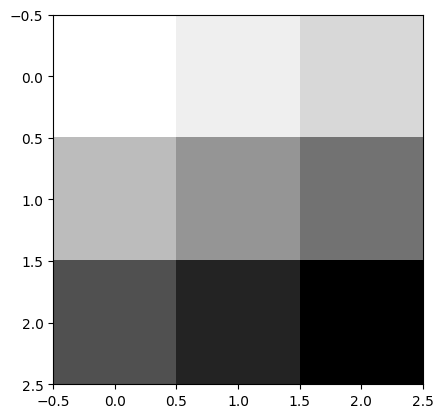

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print (image.shape)
plt.grid(False)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

In [ ]:
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print ("weight.shape", weight.shape) # (2*2) kernel, 1 input channel, 1 output channel 
conv2d=tf.nn.conv2d(image, weight, strides=[1,1], padding='VALID') # strides = [width, height]
conv2d_img=conv2d.numpy() # tensor2numpy
print ("conv2d_img.shape",conv2d_img )

weight.shape (2, 2, 1, 1)
conv2d_img.shape [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [ ]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='SAME')
conv2d = tf.nn.relu(conv2d)
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img )

conv2d_img.shape [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


In [ ]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print (image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print ("weight.shape", weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape", conv2d_img )


(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d_img.shape [[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


In [ ]:
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

weight=tf.constant([[[[1.,10., -1.]],[[1.,10., -1.]]],
                    [[[1.,10., -1.]],[[1.,10., -1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1], padding='SAME')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape )


weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


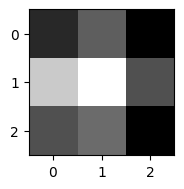

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


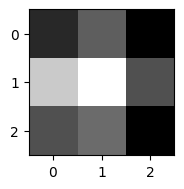

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


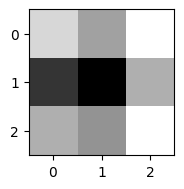

In [ ]:
# plotting Code
conv2d_img=np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    print (one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.grid(False), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

# 2. MNIST Convolution Layer

11501568/11490434 [==============================] - 0s 0us/step


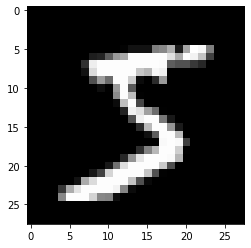

In [ ]:
# Mnist_convLayer.ipynb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
img=img.reshape(-1,28,28,1)
W1=tf.random.normal([3,3,1,5], stddev=0.01)
W1

<tf.Tensor: shape=(3, 3, 1, 5), dtype=float32, numpy=
array([[[[ 0.0058894 ,  0.01764114, -0.00140458, -0.00684673,
          -0.01178506]],

        [[-0.014321  , -0.00464156, -0.00766274,  0.02152032,
          -0.00220809]],

        [[-0.00139505,  0.00025918, -0.0119962 , -0.02510361,
          -0.00513373]]],


       [[[ 0.00310496,  0.00154896,  0.01951706,  0.01527254,
          -0.01306877]],

        [[ 0.01594552, -0.00335677, -0.00307207,  0.01106343,
           0.00211509]],

        [[-0.01009816,  0.00125275, -0.00136089,  0.00939294,
          -0.01594727]]],


       [[[ 0.00632875,  0.01938115, -0.00308961,  0.01837647,
          -0.01411136]],

        [[ 0.00611449,  0.00449217, -0.00357448,  0.0198325 ,
           0.00615616]],

        [[-0.00885762,  0.01527958,  0.01106373, -0.02189904,
           0.00823379]]]], dtype=float32)>

In [ ]:
conv2d=tf.nn.conv2d(img, W1, strides=[2,2], padding='VALID')
conv2d_img=conv2d.numpy()
print(conv2d_img.shape)


(1, 13, 13, 5)


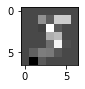

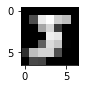

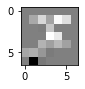

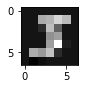

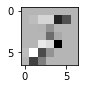

In [ ]:
pool=tf.nn.max_pool(conv2d, ksize=[2,2], strides=[2,2], padding='SAME')
pool_img=pool.numpy()
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()


# 3. MNIST CNN_TF2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print(train_images[0].shape)
print(train_images[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1580 - accuracy: 0.9542
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0378 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0281 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0221 - accuracy: 0.9931


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0343 - accuracy: 0.9897 - 1s/epoch - 4ms/step


In [ ]:
print(test_acc)

0.9897000193595886


In [ ]:
 9 * 32 + 32
 

320

In [ ]:
9*32*64+64

18496

In [ ]:
print(model.layers[2].name)


conv2d_1


In [ ]:
idx = 2

In [ ]:
len(model.layers[idx].get_weights())

2

In [ ]:
model.layers[idx].get_weights()

[array([[[[-0.02779533, -0.07592055, -0.03318109, ...,  0.16080314,
           -0.20141663,  0.01831483],
          [-0.4544023 ,  0.10423258, -0.10843063, ..., -0.0369141 ,
            0.00937845, -0.16074295],
          [-0.09053475, -0.06473734, -0.00798997, ..., -0.19309707,
            0.04220664,  0.0283494 ],
          ...,
          [-0.02132236,  0.13476762, -0.01325601, ..., -0.08743851,
           -0.04859139, -0.00237579],
          [-0.00115407,  0.1549902 ,  0.0812281 , ..., -0.17364506,
           -0.251826  , -0.03845681],
          [-0.09336995,  0.10945468, -0.00989179, ...,  0.01493909,
           -0.32837725,  0.08293115]],
 
         [[-0.0152526 , -0.00697039, -0.07978975, ...,  0.19874737,
           -0.12398291,  0.16776095],
          [-0.30117312,  0.14057088, -0.0728982 , ..., -0.17800838,
            0.01766808, -0.33008868],
          [ 0.06868022, -0.04655471, -0.00999657, ..., -0.28221846,
           -0.09968334, -0.01280111],
          ...,
          [ 0

In [ ]:
model.layers[idx].get_weights()[0].shape, model.layers[idx].get_weights()[1].shape

((3, 3, 32, 64), (64,))

In [ ]:
import numpy as np
h = model.layers[idx].output
h

<KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
train_images[0].shape, np.expand_dims(train_images[0], axis = 0).shape

((28, 28, 1), (1, 28, 28, 1))

In [ ]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = h)
activations = activation_model.predict(np.expand_dims(train_images[0], axis = 0))
activations[0].shape

1/1 [==============================] - 0s 138ms/step


(11, 11, 64)

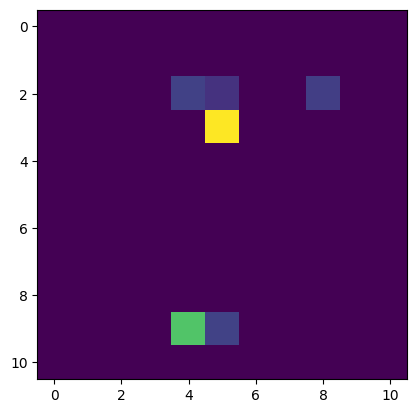

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(activations[0][:,:,63])
plt.show()

In [ ]:
feature = activations[0].sum(axis = 2)
feature.shape

(11, 11)

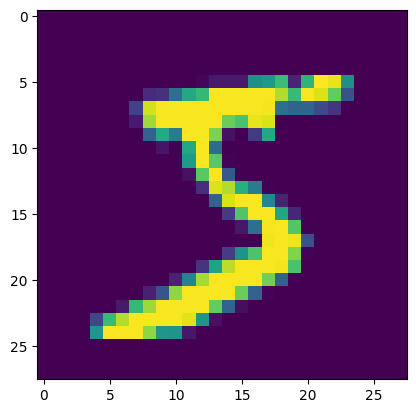

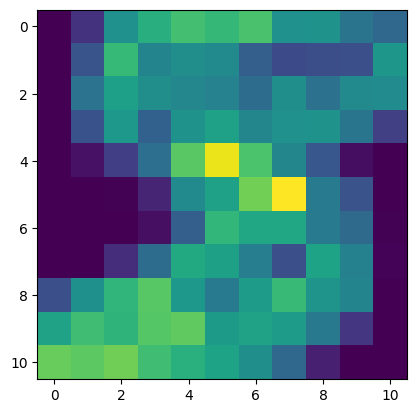

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()
plt.imshow(feature)
plt.show()